In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('ad_vs_sales.csv')
df.head()

,Ad_Expense,Sales
0,37.45,55.64
1,95.07,145.42
2,73.20,115.41
3,59.87,86.67
4,15.60,50.50


In [4]:
df.shape

(200, 2)

In [5]:
df.info

<bound method DataFrame.info of      Ad_Expense   Sales
0         37.45   55.64
1         95.07  145.42
2         73.20  115.41
3         59.87   86.67
4         15.60   50.50
..          ...     ...
195       34.92   44.81
196       72.60  104.45
197       89.71  133.46
198       88.71  207.92
199       77.99  133.94

[200 rows x 2 columns]>

In [6]:
df.isnull().sum()

Ad_Expense    0
Sales         0
dtype: int64

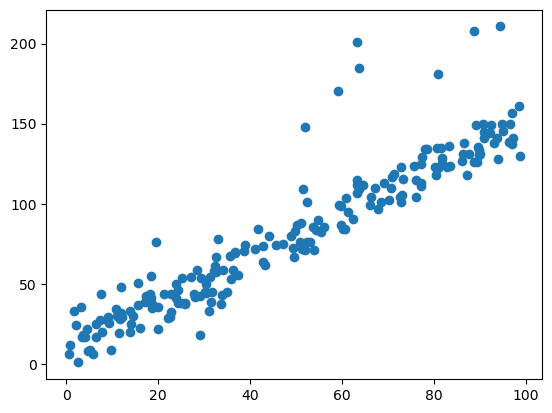

In [7]:
plt.scatter(df['Ad_Expense'],df['Sales'])

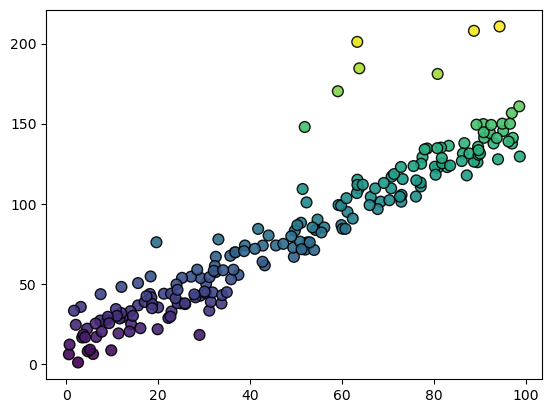

In [8]:
plt.scatter(df['Ad_Expense'], 
            df['Sales'], 
            c=df['Sales'], 
            cmap='viridis',
            s=60,
            alpha=.90, 
            edgecolor='k')   #shift + tab

Text(0.5, 1.0, 'Ad vs Sales')

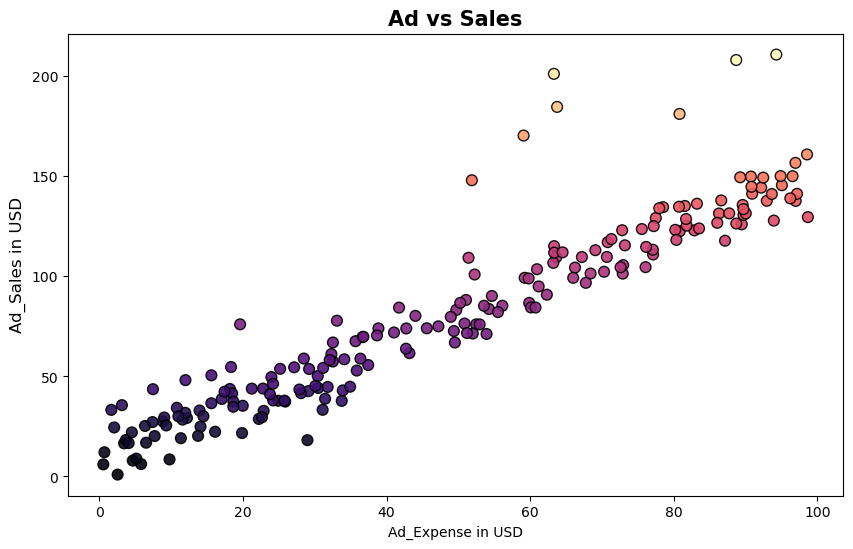

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df['Ad_Expense'],
           df['Sales'],
           c=df['Sales'],
           cmap='magma',
           s=60,
           alpha=.90,
           edgecolor='k')
plt.xlabel('Ad_Expense in USD', fontsize=10)
plt.ylabel('Ad_Sales in USD', fontsize=12)
plt.title('Ad vs Sales',fontsize=15, weight='bold')

In [10]:
df.corr()

,Ad_Expense,Sales
Ad_Expense,1.000000,0.930611
Sales,0.930611,1.000000


# LR With hardcoded formula

In [11]:
x=df['Ad_Expense']
y=df['Sales']
dev_x=x-np.mean(x)
dev_y=y-np.mean(y)

m=np.sum(dev_x*dev_y)/np.sum(dev_x**2)

In [12]:
print(m)

1.4615257314414671


In [13]:
c=np.mean(y)-m*(np.mean(x))

In [14]:
print(c)

10.305535377647857


In [15]:
df.head()

,Ad_Expense,Sales
0,37.45,55.64
1,95.07,145.42
2,73.20,115.41
3,59.87,86.67
4,15.60,50.50


In [16]:
# y=mx+c
float(m*95.07+c)

149.25278666578814

In [17]:
float(m*73.20+c)


117.28921891916326

# Linear Regression using SKLEAR

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
reg= LinearRegression()  #object reg
reg.fit(df[['Ad_Expense']], y)  #fit mean traning and x always 2D and y 1D


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [21]:
reg.coef_

array([1.46152573])

In [22]:
reg.intercept_

np.float64(10.305535377647843)

In [24]:
reg.predict([[95.07]])

E:\New folder\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([149.25278667])

In [26]:
reg.predict(df[['Ad_Expense']])

array([ 65.03967402, 149.25278667, 117.28921892,  97.80708092,
        33.10533679,  33.10533679,  18.79699988, 136.90289424,
        98.15784709, 113.79617242,  13.31627838, 152.05891607,
       131.96293726,  41.33372666,  36.87607318,  37.10991729,
        54.76514813,  87.00640576,  73.42883172,  52.86516468,
        99.73629488,  30.69381933,  52.99670199,  63.85583818,
        76.96572399, 125.06453581,  39.49220423,  85.45718849,
        96.88631971,  17.10163003,  99.09322356,  35.2245491 ,
        19.82006789, 148.98971203, 151.43046001, 128.45527551,
        54.82360916,  24.58464177, 110.30312592,  74.64189808,
        28.1361493 ,  82.6802896 ,  15.33318389, 143.20207014,
        48.12982131, 107.13161509,  55.86129243,  86.31948867,
        90.20714712,  37.32914615, 152.0150703 , 123.58839482,
       147.61587785, 141.08285783,  97.69015886, 145.04359256,
        23.2400381 ,  38.95143971,  16.91163168,  57.84896742,
        67.11504056,  49.95672847, 131.42217274,  62.45

In [28]:
df2=df.copy()
df2['Predicted'] = reg.predict(df[['Ad_Expense']])
df2.head()

,Ad_Expense,Sales,Predicted
0,37.45,55.64,65.039674
1,95.07,145.42,149.252787
2,73.20,115.41,117.289219
3,59.87,86.67,97.807081
4,15.60,50.50,33.105337


In [30]:
df2.tail()

,Ad_Expense,Sales,Predicted
195,34.92,44.81,61.342014
196,72.60,104.45,116.412303
197,89.71,133.46,141.419009
198,88.71,207.92,139.957483
199,77.99,133.94,124.289927


In [31]:
reg.score(df[['Ad_Expense']], df[['Sales']])

0.8660362663371463

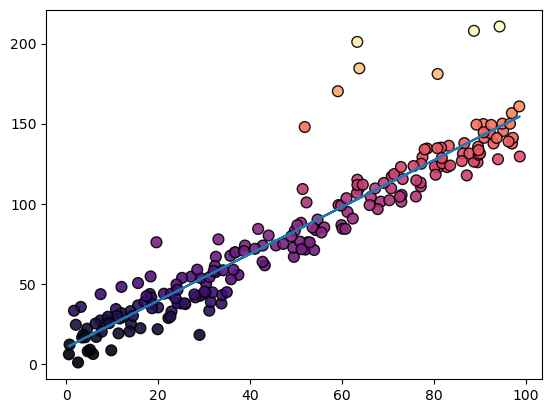

In [33]:
plt.plot(df[['Ad_Expense']], reg.predict(df[['Ad_Expense']])) # best fit line create
plt.scatter(df['Ad_Expense'],
           df['Sales'],
           c=df['Sales'],
           cmap='magma',
           s=60,
           alpha=.90,
           edgecolor='k')

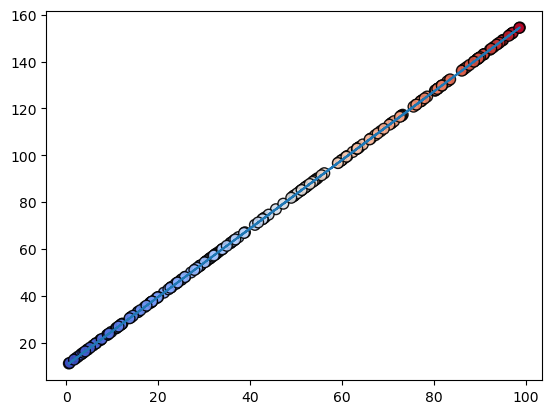

In [39]:
plt.plot(df[['Ad_Expense']], reg.predict(df[['Ad_Expense']]))

plt.scatter(df['Ad_Expense'], 
            reg.predict(df[['Ad_Expense']]), 
            c=df['Ad_Expense'], 
            cmap='coolwarm', 
            s=60, 
            alpha=.90,
            edgecolor='k') #shift + tab

[]

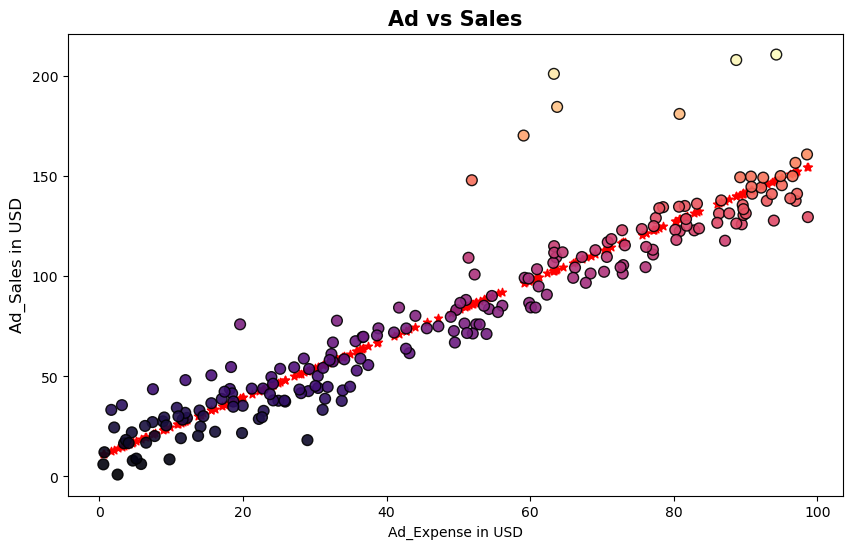

In [42]:
plt.figure(figsize=(10,6))

plt.scatter(df['Ad_Expense'], 
            reg.predict(df[['Ad_Expense']]),color='red', marker='*') #shift + tab

plt.scatter(df['Ad_Expense'],
           df['Sales'],
           c=df['Sales'],
           cmap='magma',
           s=60,
           alpha=.90,
           edgecolor='k')
plt.xlabel('Ad_Expense in USD', fontsize=10)
plt.ylabel('Ad_Sales in USD', fontsize=12)
plt.title('Ad vs Sales',fontsize=15, weight='bold')

plt.plot()

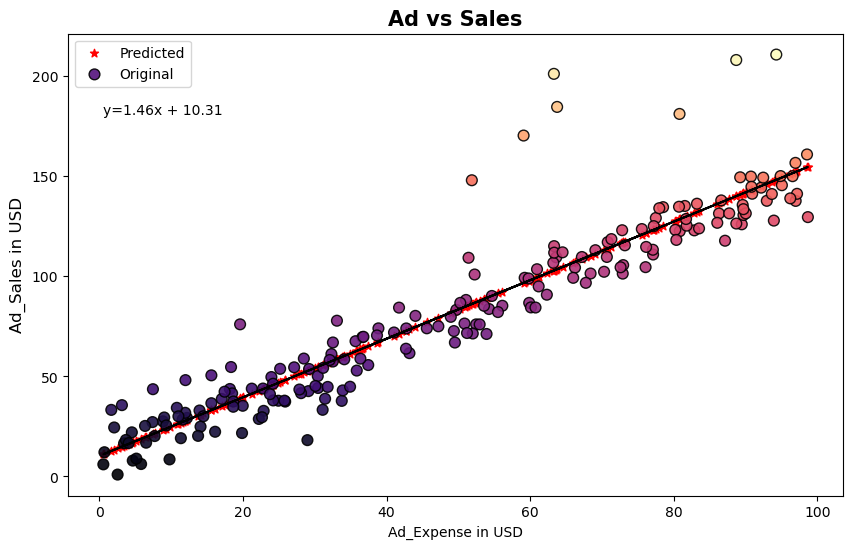

In [49]:
plt.figure(figsize=(10,6))

m=reg.coef_[0]
c=reg.intercept_
equ=f"y={float(m):.2f}x + {float(c):.2f}"

plt.text(min(df['Ad_Expense']), max(df['Sales'])-30 ,equ)

plt.scatter(df['Ad_Expense'], 
            reg.predict(df[['Ad_Expense']]),color='red', marker='*', label='Predicted') #shift + tab

plt.scatter(df['Ad_Expense'],
           df['Sales'],
           c=df['Sales'],
           cmap='magma',
           s=60,
           alpha=.90,
           edgecolor='k',
           label='Original')
plt.xlabel('Ad_Expense in USD', fontsize=10)
plt.ylabel('Ad_Sales in USD', fontsize=12)
plt.title('Ad vs Sales',fontsize=15, weight='bold')

plt.plot(df['Ad_Expense'], df2['Predicted'],color= 'black')
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(df2[['Sales']], df2['Predicted'])

285.894129853258

In [51]:
mean_absolute_error(df2[['Sales']], df2['Predicted'])

10.353198003118623